In [49]:
import numpy as np
import strawberryfields as sf
from strawberryfields.apps import qchem
import matplotlib.pyplot as plt

In [50]:
Li = sf.apps.data.Pyrrole(0).Li 
Lf = sf.apps.data.Pyrrole(0).Lf 
ri = sf.apps.data.Pyrrole(0).ri 
rf = sf.apps.data.Pyrrole(0).rf 
wi = sf.apps.data.Pyrrole(0).wi 
wf = sf.apps.data.Pyrrole(0).wf 
m = sf.apps.data.Pyrrole(0).m 

In [51]:
Ud, delta = qchem.duschinsky(Li, Lf, ri, rf, wf, m)

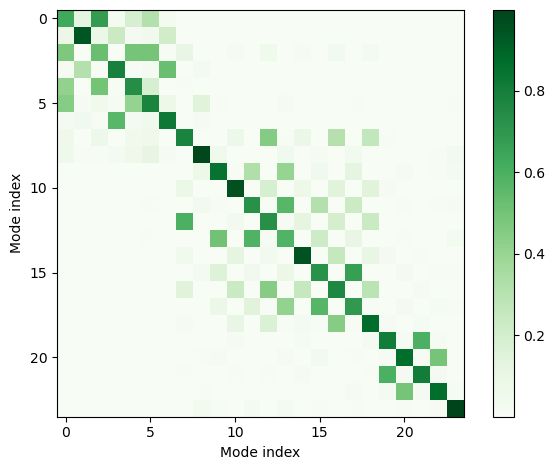

In [52]:
plt.imshow(abs(Ud), cmap="Greens")
plt.colorbar()
plt.xlabel("Mode index")
plt.ylabel("Mode index")
plt.tight_layout()
plt.show()

In [53]:
_, U1, r, U2, alpha = qchem.vibronic.gbs_params(wi, wf, Ud, delta)

In [54]:
np.random.seed(seed=1919)
n_samples = 5
n_modes = len(alpha)
eng = sf.LocalEngine(backend="gaussian")
gbs = sf.Program(n_modes)

with gbs.context as q:
    qchem.vibronic.VibronicTransition(U1, r, U2, alpha) | q
    sf.ops.MeasureFock() | q
samples = eng.run(gbs, shots=n_samples).samples.tolist()    

/Users/gshilong/miniconda3/envs/strawberryfields/lib/python3.12/site-packages/strawberryfields/backends/gaussianbackend/backend.py:216: UserWarning: Cannot simulate non-Gaussian states. Conditional state after Fock measurement has not been updated.


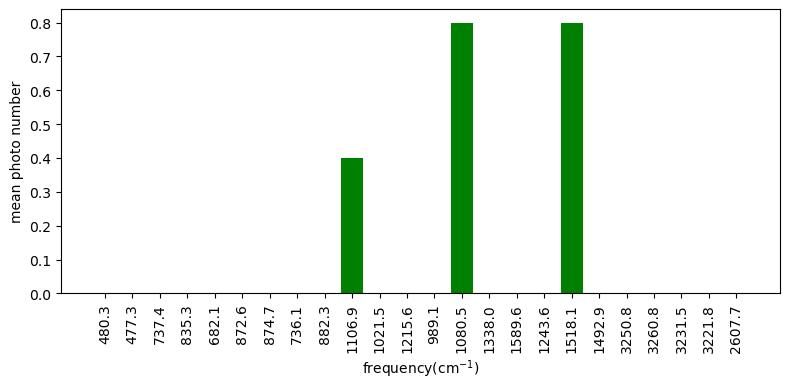

In [55]:
n_mean = np.mean(samples,axis=0)

plt.figure(figsize=(8,4))
plt.ylabel("mean photo number")
plt.xlabel(r"frequency(cm$^{-1}$)")
plt.xticks(range(len(wf)), np.round(wf, 1), rotation=90)
plt.bar(range(len(wf)), n_mean, color="green")
plt.tight_layout()
plt.show()

In [56]:
np.random.seed(seed=1919)
n_samples = 5
n_modes = len(alpha)
eng = sf.LocalEngine(backend="gaussian")
gbs = sf.Program(n_modes)

with gbs.context as q:
    sf.ops.Dgate(1) |q[19]
    qchem.vibronic.VibronicTransition(U1,r,U2,alpha)
    sf.ops.MeasureFock() |q
samples = eng.run(gbs, shots=n_samples).samples.tolist()    

/Users/gshilong/miniconda3/envs/strawberryfields/lib/python3.12/site-packages/strawberryfields/backends/gaussianbackend/backend.py:216: UserWarning: Cannot simulate non-Gaussian states. Conditional state after Fock measurement has not been updated.


/var/folders/vv/972vplgd2x77f1xfjx4tl_mr0000gp/T/ipykernel_3097/3503665190.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


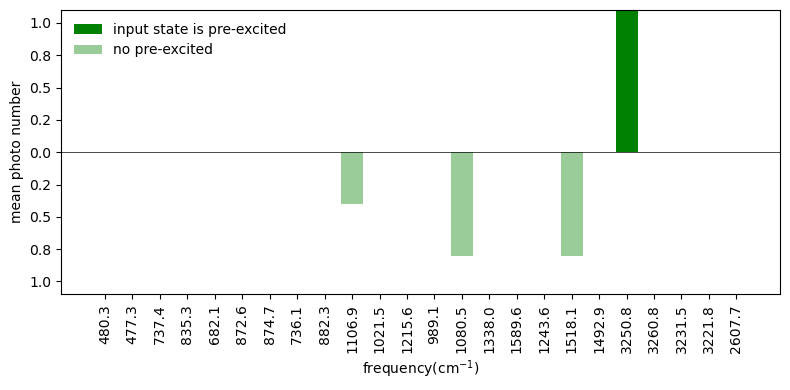

In [57]:
n_meanx = np.mean(samples,axis=0)

figure,ax=plt.subplots(figsize=(8,4))
plt.ylabel("mean photo number")
plt.xlabel(r"frequency(cm$^{-1}$)")
plt.ylim(-1.1,1.1)
ax.set_yticklabels([abs(tick) for tick in np.round(ax.get_yticks(),1)])
ax.axhline(0, color="black",lw=0.5)
plt.xticks(range(len(wf)), np.round(wf, 1), rotation=90)
plt.bar(range(len(wf)), n_meanx, color="green",label=("input state is pre-excited"))
plt.xticks(range(len(wf)), np.round(wf, 1), rotation=90)
plt.bar(range(len(wf)), -n_mean,color="green",alpha=0.4, label=("no pre-excited"))
plt.legend(frameon=False,loc=2)
plt.tight_layout()
plt.show()